In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2 , f_classif, SelectFpr, SelectFdr,SelectFwe
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
df = pd.read_csv("survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df.shape

(1259, 27)

In [4]:
null_columns=df.columns[df.isnull().any()]
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [5]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [6]:
df[df.isnull().any(axis=1)][null_columns]

,state,self_employed,work_interfere,comments
0,IL,NaN,Often,NaN
1,IN,NaN,Rarely,NaN
2,NaN,NaN,Rarely,NaN
3,NaN,NaN,Often,NaN
4,TX,NaN,Never,NaN
...,...,...,...,...
1254,NaN,No,NaN,NaN
1255,IL,No,Often,NaN
1256,CA,No,Sometimes,NaN
1257,NC,No,NaN,NaN


In [7]:
df['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [8]:
df['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [9]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [10]:
df['comments'].unique()


array([nan,
       "I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions.",
       'I have chronic low-level neurological issues that have mental health side effects. One of my supervisors has also experienced similar neurological problems so I feel more comfortable being open about my issues than I would with someone without that experience. ',
       "My company does provide healthcare but not to me as I'm on a fixed-term contract. The mental healthcare I use is provided entirely outside of my work.",
       'Relatively new job. Ask again later',
       'Sometimes I think  about using drugs for my mental health issues. If i use drugs I feel better',
       'I selected my current employer based on its policies about self care and the quality of their overall health and wellness benefits. I still have residual caution from previous employers who ranged from ambivalent to indifferent to actively hostile regarding mental he

In [11]:
df['treatment'].unique()


array(['Yes', 'No'], dtype=object)

In [12]:
df['Timestamp'].unique()

array(['2014-08-27 11:29:31', '2014-08-27 11:29:37',
       '2014-08-27 11:29:44', ..., '2015-11-07 12:36:58',
       '2015-11-30 21:25:06', '2016-02-01 23:04:31'], dtype=object)

In [13]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [14]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

# Preprocessing and Cleaning dataset

In [15]:
df.duplicated().any()

False

In [16]:
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

# Timestamp - contains date and time of when the surveyee took the survey; not really useful for analysis
Country - contains information on where the surveyee lives; this would be a useful for a really large dataset with no 1 country dominating more than half of the answers. In our dataset, roughly 59% of the surveyee reside in the USA.
state - contains information on which state in particular the surveyee lives if they ever answered USA in the Country field. Since only the rest of the 41% of the dataset live outside the USA, we have 41% of null values and would not be organic to include this one
comments - an optional field for surveyees to answer: any additional comments they would like to make regarding the survey; this will not be included since we only got 14% surveyees who answered this field. We are also not doing a text analysis.

In [17]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,No,No,Yes,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,No,No,No,NaN,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [18]:
# calculating the median age
median_age = df['Age'].median()
print(median_age)

31.0


In [19]:
df['Age'].replace([df['Age'][df['Age'] < 15]], median_age, inplace = True)
df['Age'].replace([df['Age'][df['Age'] > 100]], median_age, inplace = True)

df['Age'].unique()


array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72], dtype=int64)

In [20]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [21]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Others', inplace = True)

In [22]:
df['Gender'].value_counts()

Male      991
Female    247
Others     21
Name: Gender, dtype: int64

In [23]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [24]:
df.shape

(1259, 23)

In [25]:
columns_to_print = ['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for column in columns_to_print:
    print(f"{column}:")
    print(df[column].value_counts())
    print() 

Age:
29    85
32    82
26    75
31    75
27    71
33    70
28    68
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
57     3
54     3
47     2
60     2
58     1
62     1
65     1
53     1
61     1
72     1
Name: Age, dtype: int64

Gender:
Male      991
Female    247
Others     21
Name: Gender, dtype: int64

self_employed:
No     1095
Yes     146
Name: self_employed, dtype: int64

family_history:
No     767
Yes    492
Name: family_history, dtype: int64

treatment:
Yes    637
No     622
Name: treatment, dtype: int64

work_interfere:
Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

no_employees:
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_

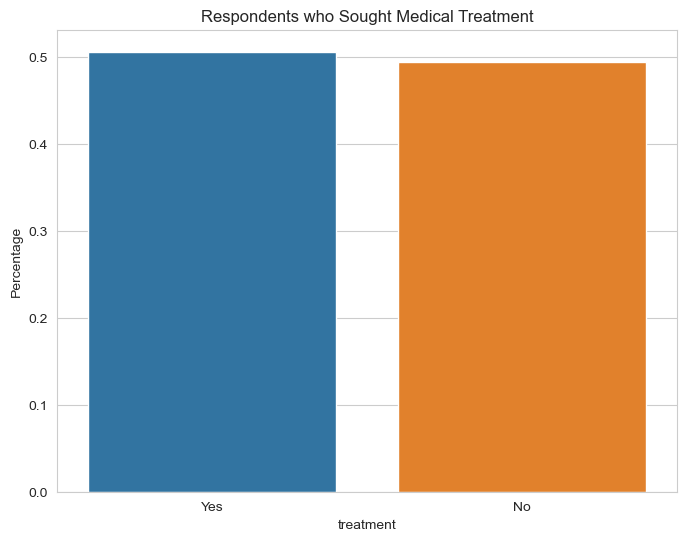

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,6))
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')
sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Respondents who Sought Medical Treatment')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_10132\1731595579.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], label = 'Skewness : %.2f'%(df['Age'].skew()))


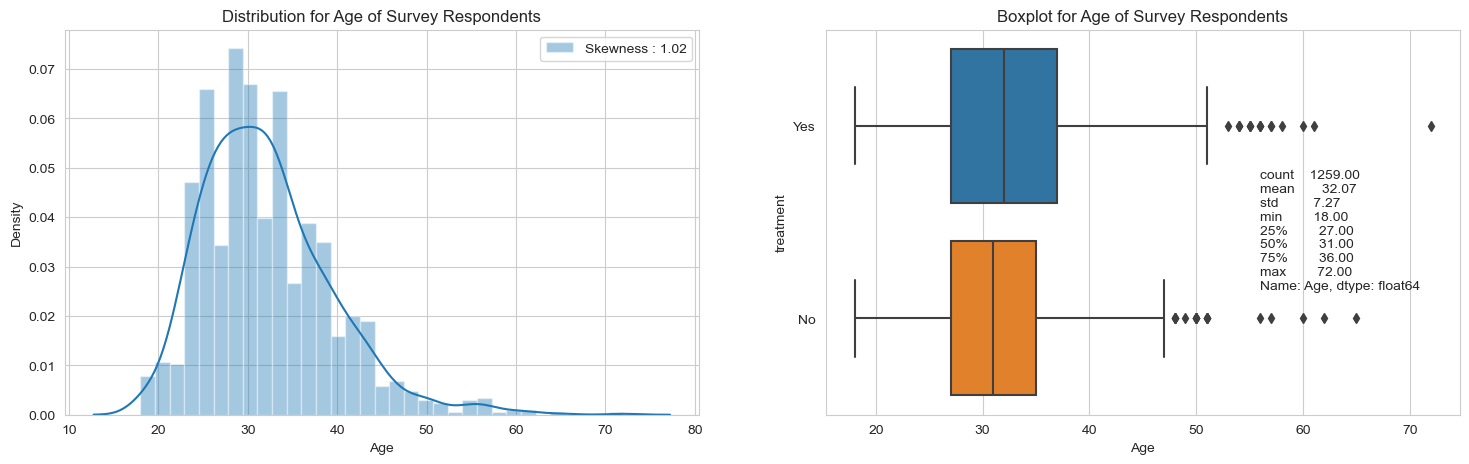

In [27]:
# Chart for Age
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'], label = 'Skewness : %.2f'%(df['Age'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Age of Survey Respondents')
plt.subplot(1,2,2)
sns.boxplot(x = "Age", y = "treatment", data = df)
plt.title('Boxplot for Age of Survey Respondents')
age = str(df['Age'].describe().round(2))
plt.text(56, 0.85, age)
plt.show()

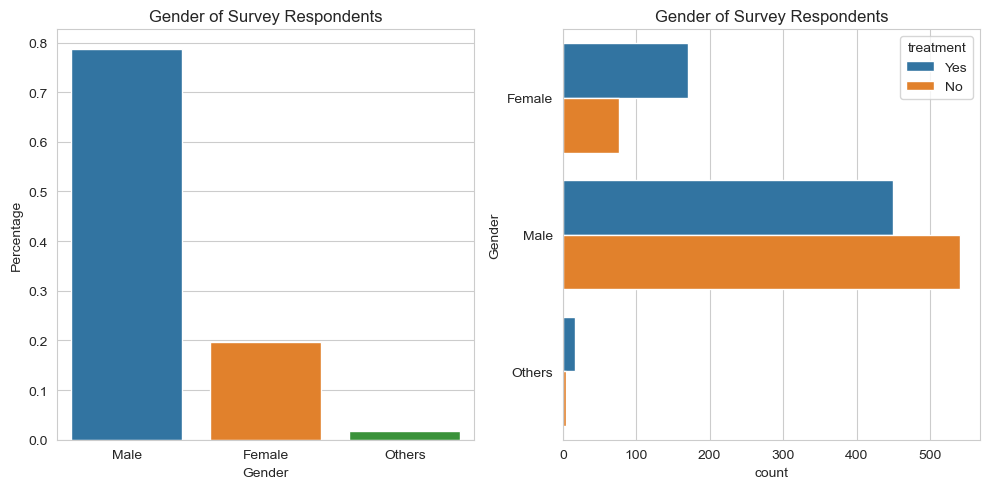

In [28]:
# Chart for Gender
plt.figure(figsize = (10, 5))

# Bar plot for Gender distribution
plt.subplot(1, 2, 1)
eda_percentage = df['Gender'].value_counts(normalize=True).rename_axis('Gender').reset_index(name='Percentage')
sns.barplot(x = 'Gender', y = 'Percentage', data=eda_percentage.head(10))
plt.title('Gender of Survey Respondents')

# Count plot for Gender with hue by Treatment
plt.subplot(1, 2, 2)
sns.countplot(y = df['Gender'], hue=df['treatment'])
plt.title('Gender of Survey Respondents')

plt.tight_layout()
plt.show()

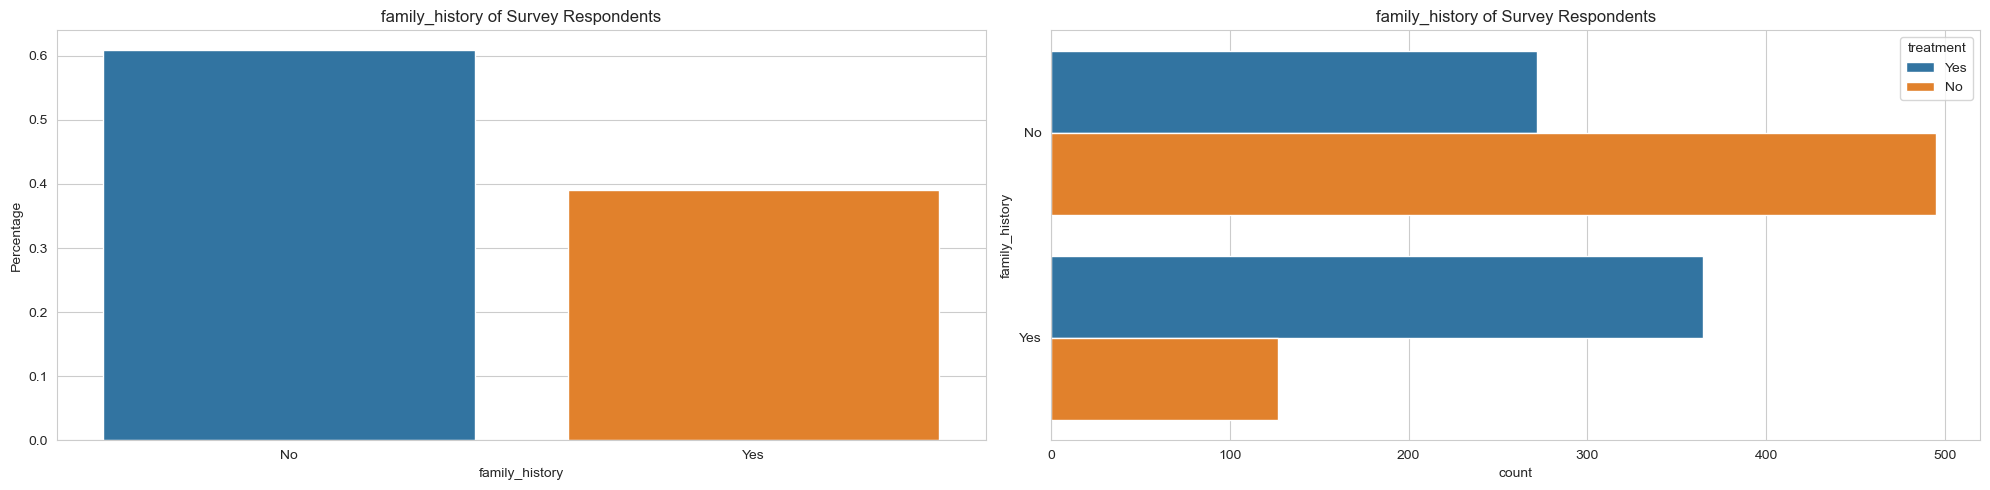

In [29]:
# Chart for family_history
plt.figure(figsize = (20, 5))

# Bar plot for Gender distribution
plt.subplot(1, 2, 1)
eda_percentage = df['family_history'].value_counts(normalize=True).rename_axis('family_history').reset_index(name='Percentage')
sns.barplot(x = 'family_history', y = 'Percentage', data=eda_percentage.head(10))
plt.title('family_history of Survey Respondents')

# Count plot for Gender with hue by Treatment
plt.subplot(1, 2, 2)
sns.countplot(y = df['family_history'], hue=df['treatment'])
plt.title('family_history of Survey Respondents')

plt.tight_layout()
plt.show()

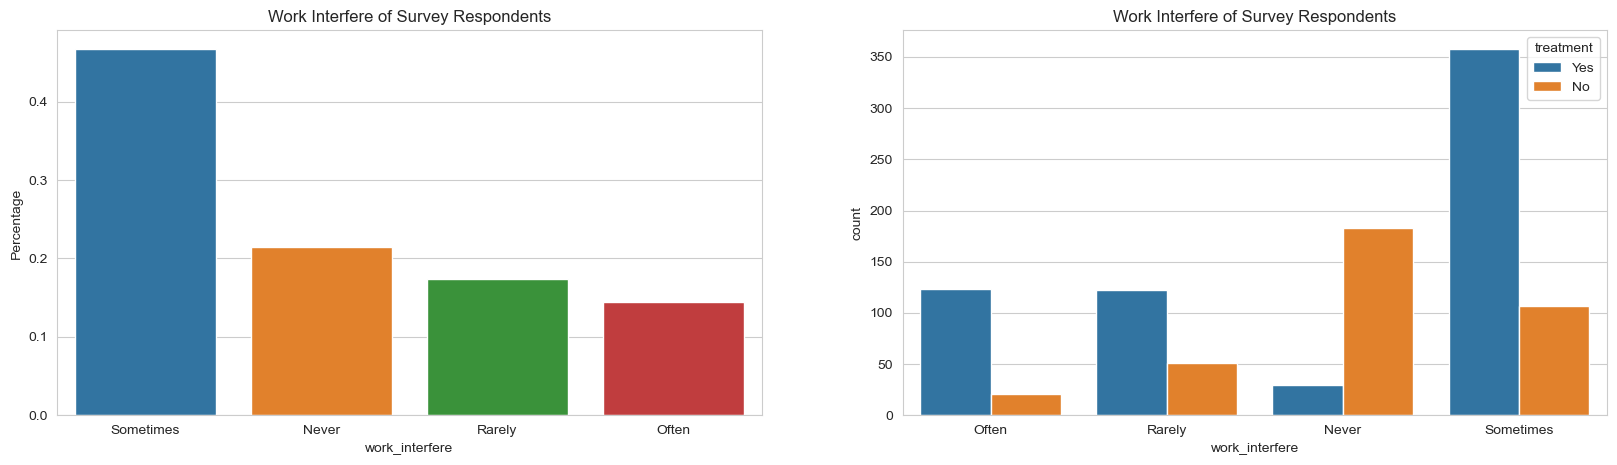

In [30]:
# Chart for Work Interference (of mental health)
plt.figure(figsize = (20,5))

# Bar plot for Work Interference distribution
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage)
plt.title('Work Interfere of Survey Respondents')

# Count plot for Work Interference with hue by Treatment
plt.subplot(1,2,2)
sns.countplot(x = df['work_interfere'], hue = df['treatment'])
plt.title('Work Interfere of Survey Respondents')
plt.show() 

In [31]:
df['treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
df['treatment'] = np.where(df['treatment'] == 'Yes', 1, 0)

In [33]:
df.head(10)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,1,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,NaN,No,0,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,0,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,1,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,0,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,NaN,Yes,0,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,Female,NaN,Yes,1,Sometimes,1-5,Yes,Yes,No,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39,Male,NaN,No,0,Never,1-5,Yes,Yes,No,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,42,Female,NaN,Yes,1,Sometimes,100-500,No,Yes,Yes,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,Male,NaN,No,0,Never,26-100,No,Yes,Don't know,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [34]:
df['treatment'].value_counts()

1    637
0    622
Name: treatment, dtype: int64

In [35]:
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [36]:
import statsmodels.api as sm

In [37]:
# Now, we separate our dependent and independent variables.
x = df.drop(["treatment"], axis=1)
y = df["treatment"]

# The independent variables will be transformed into dummy variables
x = pd.get_dummies(x, drop_first=True)

# adding constant. This is a requirement of Stats Model library. It creates a new column with float value 1
x = sm.add_constant(x)

In [38]:
x

,const,Age,Gender_Male,Gender_Others,self_employed_Yes,family_history_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_100-500,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,1.0,37,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,1.0,44,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1.0,32,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,1,0,0
3,1.0,31,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1.0,31,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1.0,26,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1255,1.0,32,1,0,0,1,1,0,0,0,...,0,0,1,1,0,1,0,0,1,0
1256,1.0,34,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1257,1.0,46,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0


In [39]:
x.shape

(1259, 45)

# Train & Test

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.30, random_state=1)

In [41]:
xtrain

,const,Age,Gender_Male,Gender_Others,self_employed_Yes,family_history_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_100-500,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
582,1.0,29,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
976,1.0,38,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
886,1.0,31,1,0,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0
561,1.0,27,1,0,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,1,0
1083,1.0,34,0,0,0,1,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1.0,31,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
905,1.0,49,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1096,1.0,24,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
235,1.0,25,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [42]:
xtest

,const,Age,Gender_Male,Gender_Others,self_employed_Yes,family_history_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_100-500,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
972,1.0,40,1,0,0,1,0,1,0,0,...,1,0,1,1,0,0,0,0,0,0
719,1.0,27,1,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,0
979,1.0,28,1,0,0,1,1,0,0,0,...,1,0,1,1,0,1,0,1,0,0
550,1.0,25,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
512,1.0,29,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,1.0,35,1,0,1,1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1014,1.0,31,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
503,1.0,25,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
401,1.0,28,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


# LinearRegression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
reg=LinearRegression()

In [45]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = reg.predict(xtest)


In [48]:
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

In [49]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.1272689364009308
R-squared (R2) Score: 0.4906961291496822


# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [51]:
lgr = LogisticRegression()

In [52]:
lgr.fit(xtrain, ytrain)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
y_pred = lgr.predict(xtest)

In [54]:
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [55]:
report = classification_report(ytest, y_pred)

In [56]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       185
           1       0.79      0.88      0.83       193

    accuracy                           0.82       378
   macro avg       0.82      0.82      0.82       378
weighted avg       0.82      0.82      0.82       378



# DecisionTreeClassifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtf= DecisionTreeClassifier()

In [59]:
dtf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [60]:
y_pred = dtf.predict(xtest)

In [61]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, y_pred)

In [62]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.7142857142857143


# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc= RandomForestClassifier(n_estimators=100, random_state=1)


In [65]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier(random_state=1)

In [66]:
y_pred = rfc.predict(xtest)

In [67]:
accuracy = accuracy_score(ytest, y_pred)

In [68]:
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.75%


# SVM

In [69]:
from sklearn.svm import SVC

In [70]:
svm_classifier = SVC(kernel='linear')

In [71]:
svm_classifier.fit(xtrain, ytrain)

SVC(kernel='linear')

In [72]:
y_pred = svm_classifier.predict(xtest)

In [73]:
accuracy = accuracy_score(ytest, y_pred)

In [74]:
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 82.80%


# K-NN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# Create a K-NN classifier with a specified number of neighbors (k)
k = 3

In [77]:
knn = KNeighborsClassifier(n_neighbors=k)

In [78]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [79]:
accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.83


# Gradient Boosting Algorithms

In [80]:
import xgboost as xgb

In [81]:
GBA = xgb.XGBClassifier()

In [82]:
GBA.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
y_pred = GBA.predict(xtest)

In [89]:
accuracy = accuracy_score(ytest, y_pred)
print(f'"Accuracy:", {accuracy:.2f}')

"Accuracy:", 0.78
